# Mean and standard deviation

**Problem 3a.** In this problem we look at the mean and the standard deviation from a more statistical point of view.
 * Generate $N=1\,000$ values $x_1,\ldots,x_n$ from Poisson($\lambda$) distribution for $\lambda=10$. You might want to use the function **poisson(lambda,shape)** from package **numpy.random**.
 * Plot a histogram of these values. What is the mean of Poisson($\lambda$)? What is the standard deviation? Are these values a good description of what you see in the histogram?
 * For $i \in \{1,\ldots,n\}$ compute $\bar{x}_i = \frac{x_1+\ldots+x_i}{i}$. Plot the values of $\bar{x}_i$.
 * On the same figure, plot a horizontal line corresponding to the expected value ($\lambda$) of all those averages.
 * Compute (analitically) the standard deviation $\sigma_i$ of the $i$-th average and plot lines $\lambda \pm \sigma_i$, again on the same figure.
 * Does the standard deviation accurately describe the *typical* deviations?

Mean: 9.983, Std: 3.15795994275


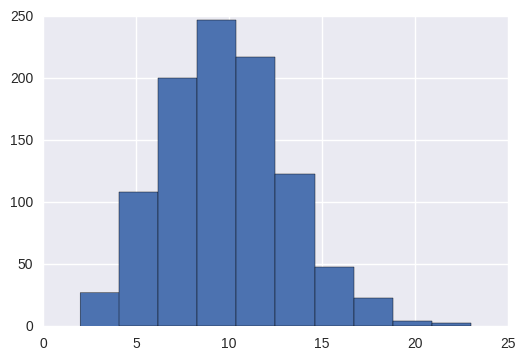

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

N = 1000
lmbd = 10

values = np.random.poisson(lmbd, N)

plt.hist(values)

print("Mean: {}, Std: {}".format(np.mean(values), np.std(values)))

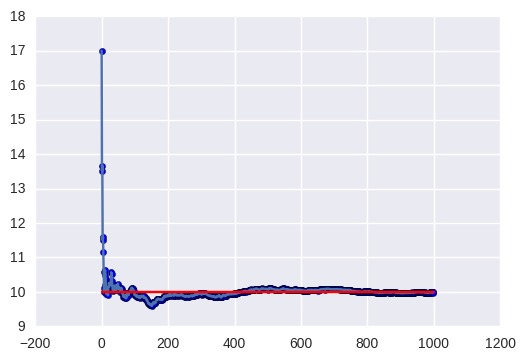

In [26]:
x = np.arange(N)
mean_values = np.cumsum(values) / (x+1)
plt.plot(x, mean_values)

plt.scatter(np.arange(N), mean_values)

x = [0,N]
y = [lmbd, lmbd]
plt.plot(x,y, c='r')


**Problem 3b.** In this task we consider a discrete distribution *without a mean* and verify whether we can still estimate the location of its peak by simply computing averages. Consider a discrete variable $X$ with the following distribution: $P(X=k) = \frac{1}{4|k|(|k|+1)}$ for $k \neq 0$ and $P(X=0) = \frac{1}{2}$. 
 * Argue that these formulas indeed describe a discrete distribution.
 * Show that $X$ does not have a mean.
 * Plot the function $f(k) = P(X=k)$ for $k \in [-10,10]$.
 * Write a function that samples from $X$'s distribution (imaginary bonus points if it is vectorized).
 * Generate $N=10\,000$ values $x_1,\ldots,x_n$ from the distribution.
 * For $i \in \{1,\ldots,n\}$ compute $\bar{x}_i = \frac{x_1+\ldots+x_i}{i}$. 
 * Plot the values of $\bar{x}_i$. Does it look like the series converges? If it is not clear, you can compute several independent
   $N$-means and plot a histogram, then increase $N$ significantly and see how it changes.
 * For $i \in \{1,\ldots,n\}$ compute $\hat{x}_i = \textrm{ median of }\{x_1,\ldots,x_i\}$. 
   You do not need to do it in a clever way (like in ASD lab).
 * Plot the values of $\hat{x}_i$. Does it look like the series converges? 
 * A more interesting situation would be the one where you a given a distribution like $X+c$ for unknown $c$, and 
   want to figure out what $c$ is, i.e. find the center of the distribution. Both methods above attempt to
   locate the center - which works better?

**Problem 3c.** We are now going to investigate an intermediate case - a variable with a finite mean, but no variance. Consider a discrete variable $Y$ with the following distribution: $P(Y=k) = \frac{1}{|k|(|k|+1)(|k|+2)}$ for $k \neq 0$ and $P(Y=0) = \frac{1}{2}$. 
 * Argue that these formulas indeed describe a discrete distribution.
 * Show that $EY=0$, but $Y$ has no variation (i.e. the defining series is not absolutely convergent).
 * Plot the function $f(k) = P(Y=k)$ for $k \in [-10,10]$.
 * Write a function that samples from $Y$'s distribution.
 * Generate $N=10\,000$ values $y_1,\ldots,y_n$ from the distribution.
 * For $i \in \{1,\ldots,n\}$ compute $\bar{y}_i = \frac{y_1+\ldots+y_i}{i}$. 
 * Plot the values of $\bar{y}_i$. Does it look like the series converges?
 * For $i \in \{1,\ldots,n\}$ compute $\hat{y}_i = \textrm{ median of }\{y_1,\ldots,y_i\}$.
 * Plot the values of $\hat{y}_i$.
 * Discuss the results obtained.

![title](img/lab03.jpg)

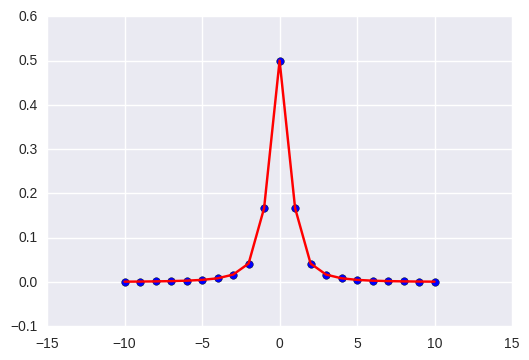

In [27]:
# Plot the function f(k)

from __future__ import division

distribution = lambda k: 1/(abs(k)*(abs(k)+1)*(abs(k)+2)) if k else 0.5
x = np.arange(-10, 11)
y = np.vectorize(distribution)(x)

plt.plot(x, y, c='r')
plt.scatter(x, y, s=30)

In [28]:
# Write function that samples from distribution using inverse transform sampling

# take u between 0 and 1
# return sup x : P(-inf < X < x) <= u

from __future__ import division
import random
import math


def get_k():
    # P(k = 0) = 1/2
    # P(k < 0) = P(k > 0) = 1/4
    choices = {
        1: -1,
        2: 0,
        3: 0,
        4: 1
    }
    
    sign = choices[random.randint(1,4)]
    prob = np.random.uniform() / 4
    sum_dist_p = 0
    k = 1

    while sum_dist_p <= prob:
        sum_dist_p += 1 /(k*(k+1)*(k+2))
        k += 1

    return sign * k

In [29]:
# Generate 10,000 values from distribution
N = 10**4
x = np.arange(N)


values = np.array([get_k() for i in range(N)])

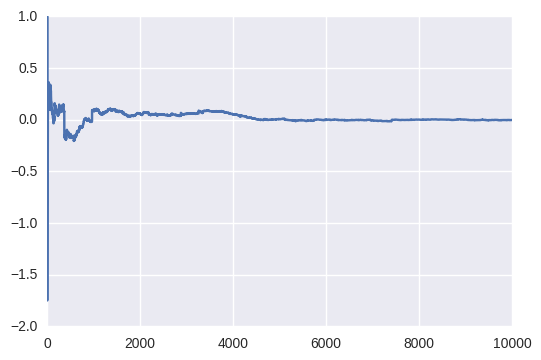

In [24]:
# Compute mean y_i 
mean_values = np.cumsum(values) / (x+1)
plt.plot(x, mean_values)

(-5e-07, 1e-06)

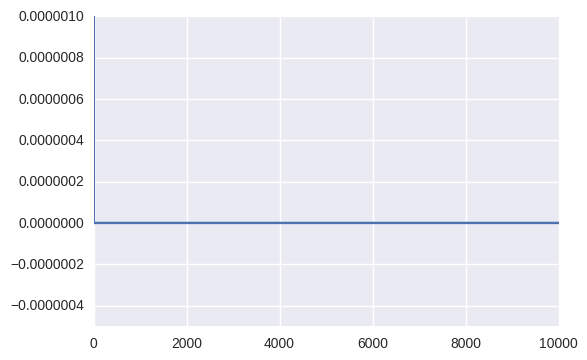

In [22]:
# Compute median y_i
median_values = [np.median(values[:(i+1)]) for i in x]
plt.plot(x, median_values)
plt.ylim([-0.0000005, 0.000001])